In [1]:
import torch
import gpytorch
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import numpy as np
plt.style.use('ggplot')

## Individual Kernels

### Radial Basis Kernel

In [2]:
x = torch.linspace(-4, 4, 150).reshape(-1, 1)

In [4]:
# 1
lengthscale_constraint_1 = gpytorch.constraints.Interval(0.99, 1)
outputscale_constraint_1 = gpytorch.constraints.Interval(0.99, 1)

# 2
lengthscale_constraint_2 = gpytorch.constraints.Interval(0.3, 0.31)
outputscale_constraint_2 = gpytorch.constraints.Interval(0.99, 1)

# 3
lengthscale_constraint_3 = gpytorch.constraints.Interval(2, 2.1)
outputscale_constraint_3 = gpytorch.constraints.Interval(0.99, 1)

In [5]:
rbf_kernel = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel(
        lengthscale_constraint=lengthscale_constraint_1
    ),
    outputscale_constraint=outputscale_constraint_1
    )

kernel_func = rbf_kernel(x)

mvd = gpytorch.distributions.MultivariateNormal(
    mean=torch.zeros(150),
    covariance_matrix=kernel_func
)

mvd_samples_1 = mvd.sample(torch.Size([1]))

/Users/wastechs/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/gpytorch/utils/cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(
/Users/wastechs/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/gpytorch/utils/cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-05 to the diagonal
  warnings.warn(


In [15]:
rbf_kernel_2 = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel(
        lengthscale_constraint=lengthscale_constraint_2
    ),
    outputscale_constraint=outputscale_constraint_2
    )

kernel_func = rbf_kernel_2(x)

mvd = gpytorch.distributions.MultivariateNormal(
    mean=torch.zeros(150),
    covariance_matrix=kernel_func
)

mvd_samples_2 = mvd.sample(torch.Size([1]))

/Users/wastechs/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/gpytorch/utils/cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(
/Users/wastechs/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/gpytorch/utils/cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-05 to the diagonal
  warnings.warn(
/Users/wastechs/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/gpytorch/utils/cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-04 to the diagonal
  warnings.warn(


In [16]:
rbf_kernel_3 = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel(
        lengthscale_constraint=lengthscale_constraint_3
    ),
    outputscale_constraint=outputscale_constraint_3
    )

kernel_func = rbf_kernel_3(x)

mvd = gpytorch.distributions.MultivariateNormal(
    mean=torch.zeros(150),
    covariance_matrix=kernel_func
)

mvd_samples_3 = mvd.sample(torch.Size([1]))

In [ ]:
samples = torch.concat((mvd_samples_1, mvd_samples_2, mvd_samples_3))

plt.figure(figsize=(16, 6))
[plt.plot(x, sample) for sample in samples]
plt.ylabel('Y', size=14)
plt.xticks(fontsize=14)
plt.xlabel('X', size=14)
plt.xticks(fontsize=14)
plt.title('Samples from Prior RBF Kernel')
plt.legend([
    '$\ell = 1$, $\sigma = 1$',
    '$\ell = 0.3$, $\sigma = 1$',
    '$\ell = 2$, $\sigma = 1$'],
    fontsize=14)
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(kernel_func.evaluate(), cmap=cm.YlGnBu, origin='lower')
plt.xlabel('X', fontsize=13)
plt.ylabel('X', fontsize=13)
cbar = plt.colorbar()
cbar.ax.set_ylabel('$K(X, X)$', fontsize=13)
plt.show()

### Periodic Kernel

In [ ]:
x = torch.linspace(-4, 4, 150).reshape(-1, 1)

In [6]:
periodic_prior_1 = gpytorch.constraints.Interval(1, 1.01)
periodic_lengthscale_prior_1 = gpytorch.priors.GammaPrior(1, 1)
#periodic_outputscale_prior_1 = gpytorch.constraints.Interval(5, 6)

periodic_prior_2 = gpytorch.constraints.Interval(0.5, 0.51)
periodic_lengthscale_prior_2 = gpytorch.priors.GammaPrior(1, 1)
#periodic_outputscale_prior_2 = gpytorch.constraints.Interval(5, 6)

periodic_prior_3 = gpytorch.constraints.Interval(1, 1.1)
periodic_lengthscale_prior_3 = gpytorch.priors.GammaPrior(2, 1)
#periodic_outputscale_prior_3 = gpytorch.constraints.Interval(5, 6)

outputscale = gpytorch.constraints.Interval(1, 1.01)

In [7]:
periodic_kernel = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
    period_length_constraint=periodic_prior_1
    ),
    outputscale_constraint=outputscale
)

periodic_kernel.base_kernel.lengthscale = periodic_lengthscale_prior_1.mean

periodic_kernel_func = periodic_kernel(x)

mvd = gpytorch.distributions.MultivariateNormal(
    mean=torch.zeros(150),
    covariance_matrix=periodic_kernel_func
)

mvd_samples_1 = mvd.sample(torch.Size([1]))

In [17]:
periodic_kernel_2 = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
    period_length_constraint=periodic_prior_2
    ),
    outputscale_constraint=outputscale
)

periodic_kernel.base_kernel.lengthscale = periodic_lengthscale_prior_2.mean

periodic_kernel_func = periodic_kernel_2(x)

mvd = gpytorch.distributions.MultivariateNormal(
    mean=torch.zeros(150),
    covariance_matrix=periodic_kernel_func
)

mvd_samples_2 = mvd.sample(torch.Size([1]))

/Users/wastechs/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/gpytorch/utils/cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(
/Users/wastechs/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/gpytorch/utils/cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-05 to the diagonal
  warnings.warn(
/Users/wastechs/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/gpytorch/utils/cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-04 to the diagonal
  warnings.warn(


In [18]:
periodic_kernel_3 = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
    period_length_constraint=periodic_prior_3
    ),
    outputscale_constraint=outputscale
)

periodic_kernel.base_kernel.lengthscale = periodic_lengthscale_prior_3.mean

periodic_kernel_func = periodic_kernel_3(x)

mvd = gpytorch.distributions.MultivariateNormal(
    mean=torch.zeros(150),
    covariance_matrix=periodic_kernel_func
)

mvd_samples_3 = mvd.sample(torch.Size([1]))

/Users/wastechs/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/gpytorch/utils/cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(
/Users/wastechs/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/gpytorch/utils/cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-05 to the diagonal
  warnings.warn(


In [ ]:
samples = torch.concat((mvd_samples_1, mvd_samples_2, mvd_samples_3))

plt.figure(figsize=(16, 6))
[plt.plot(x, sample) for sample in samples]
plt.ylabel('Y', size=14)
plt.xticks(fontsize=14)
plt.xlabel('X', size=14)
plt.xticks(fontsize=14)
plt.title('Samples from Prior Periodic Kernel')
plt.legend([
    '$\ell = 1$, $p = 1$, $\sigma = 1$',
    '$\ell = 1$, $p = 0.5$, $\sigma = 1$',
    '$\ell = 2$, $p = 1$, $\sigma = 1$'],
    fontsize=14)
plt.show()

### Rational Quadratic Kernel

In [2]:
x = torch.linspace(-4, 4, 150).reshape(-1, 1)

In [29]:
#alpha_1 = gpytorch.priors.GammaPrior(2, 0.5)
alpha_const_1 = gpytorch.constraints.Interval(1, 1.01)
length_const_1 = gpytorch.constraints.Interval(1, 1.01)

#alpha_2 = gpytorch.priors.GammaPrior(2, 0.5)
alpha_const_2 = gpytorch.constraints.Interval(1, 1.01)
length_const_2 = gpytorch.constraints.Interval(0.2, 0.201)

#alpha_3 = gpytorch.priors.GammaPrior(2, 0.5)
alpha_const_3 = gpytorch.constraints.Interval(1000, 1001)
length_const_3 = gpytorch.constraints.Interval(1, 1.01)

outputscale = gpytorch.constraints.Interval(1, 1.01)

In [34]:
rational_quadratic = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel(
        alpha_constraint=alpha_const_1,
        lengthscale_constraint=length_const_1
    ),
    outputscale_constraint=outputscale
)

rational_quadratic_func = rational_quadratic(x)

mvd = gpytorch.distributions.MultivariateNormal(
    mean=torch.zeros(150),
    covariance_matrix=rational_quadratic_func
)

mvd_samples_1 = mvd.sample(torch.Size([1]))

/Users/wastechs/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/gpytorch/utils/cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(
/Users/wastechs/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/gpytorch/utils/cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-05 to the diagonal
  warnings.warn(


In [35]:
rational_quadratic = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel(
        alpha_constraint=alpha_const_2,
        lengthscale_constraint=length_const_2
    ),
    outputscale_constraint=outputscale
)

rational_quadratic_func = rational_quadratic(x)

mvd = gpytorch.distributions.MultivariateNormal(
    mean=torch.zeros(150),
    covariance_matrix=rational_quadratic_func
)

mvd_samples_2 = mvd.sample(torch.Size([1]))

In [36]:
rational_quadratic = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel(
        alpha_constraint=alpha_const_3,
        lengthscale_constraint=length_const_3
    ),
    outputscale_constraint=outputscale
)

rational_quadratic_func = rational_quadratic(x)

mvd = gpytorch.distributions.MultivariateNormal(
    mean=torch.zeros(150),
    covariance_matrix=rational_quadratic_func
)

mvd_samples_3 = mvd.sample(torch.Size([1]))

/Users/wastechs/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/gpytorch/utils/cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-04 to the diagonal
  warnings.warn(
/Users/wastechs/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/gpytorch/lazy/lazy_tensor.py:1687: NumericalWarning: Runtime Error when computing Cholesky decomposition: Matrix not positive definite after repeatedly adding jitter up to 1.0e-04.. Using symeig method.
  warnings.warn(


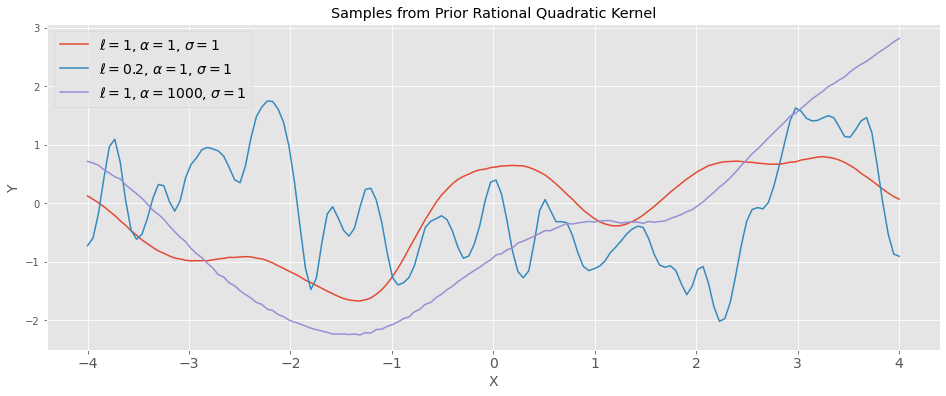

In [37]:
samples = torch.concat((mvd_samples_1, mvd_samples_2, mvd_samples_3))

plt.figure(figsize=(16, 6))
[plt.plot(x, sample) for sample in samples]
plt.ylabel('Y', size=14)
plt.xticks(fontsize=14)
plt.xlabel('X', size=14)
plt.xticks(fontsize=14)
plt.title('Samples from Prior Rational Quadratic Kernel')
plt.legend([
    '$\ell = 1$, $\\alpha = 1$, $\sigma = 1$',
    '$\ell = 0.2$, $\\alpha = 1$, $\sigma = 1$',
    '$\ell = 1$, $\\alpha = 1000$, $\sigma = 1$'],
    fontsize=14)
plt.show()

In [ ]:
x = torch.linspace(-2, 2, 150).reshape(-1, 1)

In [ ]:
#periodic_prior = gpytorch.priors.GammaPrior(2, 1)
#periodic_lengthscale_prior = gpytorch.priors.GammaPrior(2, 1)
nu = 3/2
mat_lengthscale = gpytorch.constraints.Interval(0.2, 0.201)

matern = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.MaternKernel(
        nu=nu,
        lengthscale_constraint=mat_lengthscale)
)

#periodic_kernel.lengthscale = periodic_lengthscale_prior.mean

matern_func = matern(x)

mvd = gpytorch.distributions.MultivariateNormal(
    mean=torch.zeros(150),
    covariance_matrix=matern_func
)

mvd_samples = mvd.sample(torch.Size([5]))

plt.figure(figsize=(16, 6))
[plt.plot(x, sample) for sample in mvd_samples]
plt.title('Samples from Prior Matern Kernel')
plt.show()

## Kernel Compositions

### Locally-Periodic

Product of stationary kernel with a non-stationary kernel. Product means probabilistic "AND"

In [23]:
covar = rbf_kernel * periodic_kernel

locally_periodic = covar(x)

mvd = gpytorch.distributions.MultivariateNormal(
    mean=torch.zeros(150),
    covariance_matrix=locally_periodic
)

mvd_samples_1 = mvd.sample(torch.Size([1]))

/Users/wastechs/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/gpytorch/utils/cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(


In [24]:
covar_2 = rbf_kernel_2 * periodic_kernel_2

locally_periodic_2 = covar_2(x)

mvd_2 = gpytorch.distributions.MultivariateNormal(
    mean=torch.zeros(150),
    covariance_matrix=locally_periodic_2
)

mvd_samples_2 = mvd_2.sample(torch.Size([1]))

In [25]:
covar_3 = rbf_kernel_3 * periodic_kernel_3

locally_periodic_3 = covar_3(x)

mvd_3 = gpytorch.distributions.MultivariateNormal(
    mean=torch.zeros(150),
    covariance_matrix=locally_periodic_3
)

mvd_samples_3 = mvd_3.sample(torch.Size([1]))

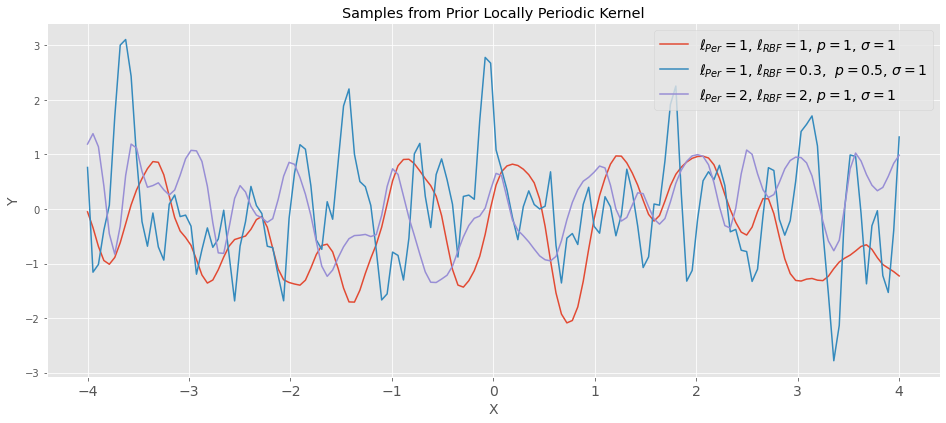

In [33]:
samples = torch.concat((mvd_samples_1, mvd_samples_2, mvd_samples_3))

plt.figure(figsize=(16, 6.5))
[plt.plot(x, sample) for sample in samples]
plt.ylabel('Y', size=14)
plt.xticks(fontsize=14)
plt.xlabel('X', size=14)
plt.xticks(fontsize=14)
plt.title('Samples from Prior Locally Periodic Kernel')
plt.legend([
    '$\ell_{Per} = 1$, $\ell_{RBF} = 1$, $p = 1$, $\sigma = 1$',
    '$\ell_{Per} = 1$, $\ell_{RBF} = 0.3$,  $p = 0.5$, $\sigma = 1$',
    '$\ell_{Per} = 2$, $\ell_{RBF} = 2$, $p = 1$, $\sigma = 1$'],
    fontsize=14)
plt.show()

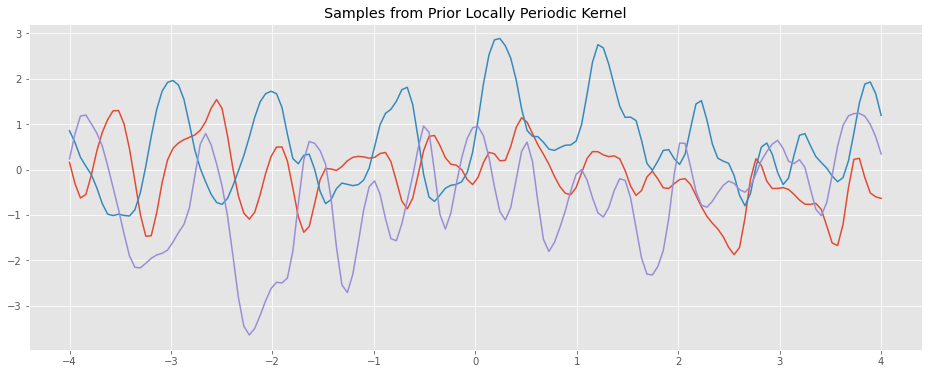

In [12]:
plt.figure(figsize=(16, 6))
[plt.plot(x, sample) for sample in mvd_samples]
plt.title('Samples from Prior Locally Periodic Kernel')
plt.show()

### Addition

Adding kernels is an elementwise addition of their corresponding covariance matrices. This means the covariances of the matrices of the two added kernels will only have a low value if both of their covariances have a low value
 - The addition can be interpreted as the probablistic "OR"

In [ ]:
kernel_func = gpytorch.kernels.AdditiveKernel(rbf_kernel, periodic_kernel)
kernel = kernel_func(x)

mvd = gpytorch.distributions.MultivariateNormal(
    mean=torch.zeros(150),
    covariance_matrix=kernel
)

mvd_samples = mvd.sample(torch.Size([5]))

In [ ]:
plt.figure(figsize=(16, 6))
[plt.plot(x, sample) for sample in mvd_samples]
plt.title('Samples from Prior Additive Kernel')
plt.show()